In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Conv2DTranspose,Dense,Reshape
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Model
from keras.datasets import cifar10
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
from keras.utils import plot_model
import cv2
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


**A simple automatic colorization algorithm seems like a suitable problem for
autoencoders. If we can train the autoencoder with a sufficient number of grayscale
photos as input and the corresponding colored photos as output, it could possibly
discover the hidden structure on properly applying colors. Roughly, it is the reverse
process of denoising. The question is, can an autoencoder add color (good noise)
to the original grayscale image**

In [2]:
(xtrain,ytrain),(xvalid,yvalid)=cifar10.load_data()

170500096/170498071 [==============================] - 21s 0us/step


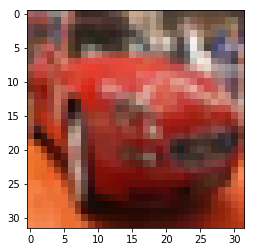

In [3]:
plt.imshow(xtrain[5])

In [4]:
xtrain1=xtrain.astype(np.float32)/255

In [5]:
xvalid1=xvalid.astype(np.float32)/255

In [6]:
imgsize=32
Ntrain=50000

In [7]:
def rgb2gray(imgarray):
    return(np.dot(imgarray,[0.487,0.400,0.114]))           # Simple Dotproduct 5000x32x32x3 with 3 will give 50000x32x32

In [8]:
xtrain2=rgb2gray(xtrain1)

In [9]:
xvalid2=rgb2gray(xvalid1)

In [10]:
xtrain2=xtrain2.reshape((-1,32,32,1))

In [11]:
xvalid2=xvalid2.reshape((-1,32,32,1))

In [12]:
imgshape=(32,32,1)
latentdims=256

In [13]:
inp=Input(imgshape)
x=Conv2D(64,kernel_size=3,strides=2,activation='relu',padding='same')(inp)
x=Conv2D(128,kernel_size=3,strides=2,activation='relu',padding='same')(x)
x=Conv2D(256,kernel_size=3,strides=2,activation='relu',padding='same')(x)
x=Flatten()(x)
encod=Dense(latentdims)(x)


Instructions for updating:
Colocations handled automatically by placer.


In [14]:
encoder=Model(inp,encod)

In [15]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1048832   
Total params: 1,418,496
Trainable params: 1,418,496
Non-trainable params: 0
_________________________________________________________________


In [16]:
inp1=Input((latentdims,))
x=Dense(4*4*256)(inp1)
x=Reshape((4,4,256))(x)
print(x.get_shape())
x=Conv2DTranspose(filters=256,kernel_size=3,strides=2,activation='relu',padding='same')(x)
print(x.get_shape())
x=Conv2DTranspose(filters=128,kernel_size=3,strides=2,activation='relu',padding='same')(x)
x=Conv2DTranspose(filters=64,kernel_size=3,strides=2,activation='relu',padding='same')(x)
out=Conv2DTranspose(filters=3,kernel_size=3,padding='same')(x)


(?, 4, 4, 256)
(?, ?, ?, 256)


In [17]:
decoder=Model(inp1,out)

In [18]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              1052672   
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 256)         590080    
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 128)       295040    
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 32, 64)        73792     
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 32, 3)         1731      
Total para

In [19]:
autoencoder=Model(inp,decoder(encoder(inp)))

In [20]:
autoencoder.compile(loss='mse',optimizer='adam')

In [21]:
history=autoencoder.fit(xtrain2,xtrain1,batch_size=32,epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
50000/50000 [==============================] - 17s 341us/step - loss: 0.0181
Epoch 2/30
50000/50000 [==============================] - 15s 300us/step - loss: 0.0109
Epoch 3/30
50000/50000 [==============================] - 15s 296us/step - loss: 0.0097
Epoch 4/30
50000/50000 [==============================] - 15s 294us/step - loss: 0.0090
Epoch 5/30
50000/50000 [==============================] - 15s 294us/step - loss: 0.0087
Epoch 6/30
50000/50000 [==============================] - 15s 296us/step - loss: 0.0083
Epoch 7/30
50000/50000 [==============================] - 15s 297us/step - loss: 0.0080
Epoch 8/30
50000/50000 [==============================] - 15s 297us/step - loss: 0.0078
Epoch 9/30
50000/50000 [==============================] - 15s 297us/step - loss: 0.0075
Epoch 10/30
50000/50000 [==============================] - 15s 295us/step - loss: 0.0073
Epoch 11/30
50000/50000 [==============================] - 15s 299us/st

In [22]:
predimg=autoencoder.predict(xtrain2[:10])

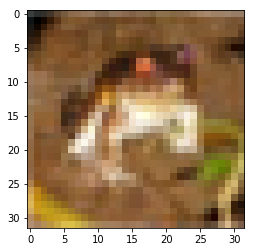

In [23]:
plt.imshow(xtrain1[0])

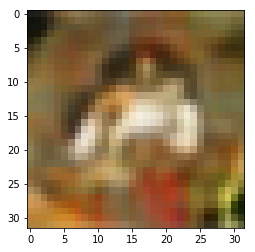

In [24]:
plt.imshow(predimg[0])

In [25]:
#Checking Quality of Images produced


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


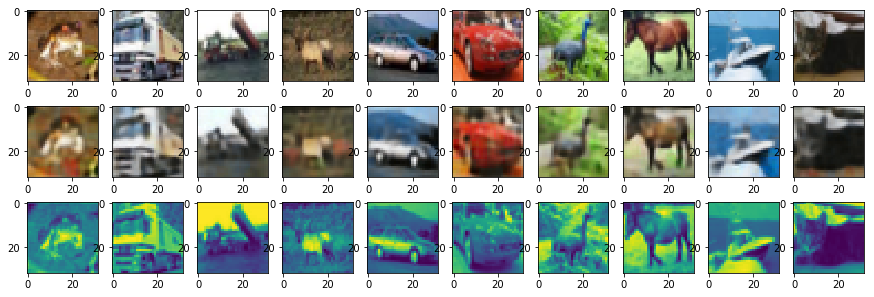

In [26]:
fig,axes=plt.subplots(3,10)
fig.set_figwidth(15)
fig.set_figheight(5)
for i in range(10):
    axes[0,i].imshow(xtrain1[i])
    axes[1,i].imshow(predimg[i])
    axes[2,i].imshow(xtrain2[i].reshape((32,32)))

**Checking on test images**

In [27]:
predvalidimages=autoencoder.predict(xvalid2[:10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


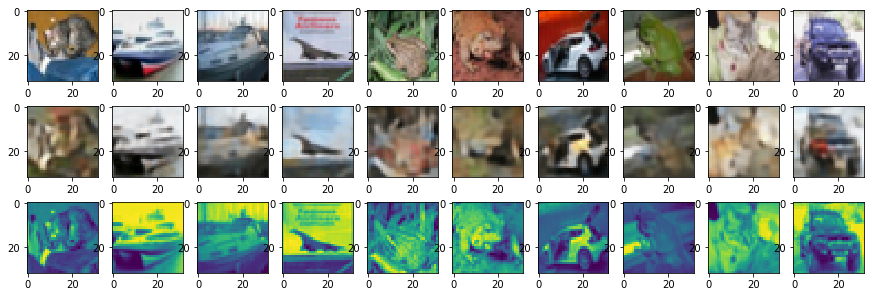

In [28]:
fig,axes=plt.subplots(3,10)
fig.set_figwidth(15)
fig.set_figheight(5)
for i in range(10):
    axes[0,i].imshow(xvalid1[i])
    axes[1,i].imshow(predvalidimages[i])
    axes[2,i].imshow(xvalid2[i].reshape((32,32)))